> # **Métodos Computacionales I - Taller #2**

Hecho por: Claudia Cuellar Nieto & Thomas Andrade Hernández


In [2]:
# Zona de librerías:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import sympy as sym
import pandas as pd
from tqdm import tqdm
from time import sleep
import os.path as path
import os
import wget

> **3. Derivación e Integración Numérica:**

**c)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada progresiva de orden $\mathcal{O}(h^2)$ en el intervalo $[0.1, 1.1]$ con $h = 0.01$.

In [3]:
def main_function(x):
    return np.sqrt(np.tan(x))

# Definimos el proceso general para el cálculo de la derivada progresiva:

def Progressive_Derivative(function, x, h = 1e-2):
    expression = -3*function(x) + 4*function(x + h) - function(x + 2*h)
    return (1)/(2*h) * expression

# Mostramos el cálculo de la misma derivada para 100 puntos entre 0.1 y 1.1:

x = np.linspace(0.1, 1.1, 100)
y = Progressive_Derivative(main_function, x)
y

array([1.5910402 , 1.51951281, 1.45748539, 1.40311625, 1.35503073,
       1.31217941, 1.27374555, 1.23908283, 1.20767226, 1.17909173,
       1.15299402, 1.12909058, 1.10713946, 1.08693609, 1.06830626,
       1.05110061, 1.03519031, 1.02046361, 1.00682313, 0.99418358,
       0.98246998, 0.97161617, 0.96156358, 0.95226016, 0.94365961,
       0.93572056, 0.92840605, 0.92168296, 0.91552157, 0.90989523,
       0.90477995, 0.90015423, 0.89599871, 0.89229605, 0.88903067,
       0.88618866, 0.8837576 , 0.88172645, 0.88008545, 0.87882601,
       0.87794066, 0.87742295, 0.87726741, 0.87746948, 0.87802547,
       0.87893255, 0.88018866, 0.88179253, 0.88374364, 0.88604221,
       0.88868915, 0.89168612, 0.89503546, 0.89874022, 0.90280416,
       0.90723173, 0.91202813, 0.91719926, 0.92275179, 0.92869314,
       0.93503154, 0.94177601, 0.94893644, 0.95652359, 0.96454914,
       0.97302575, 0.98196708, 0.99138788, 1.00130399, 1.0117325 ,
       1.02269172, 1.03420134, 1.04628249, 1.05895781, 1.07225

**d)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada central de orden $\mathcal{O}(h^2)$ en el intervalo $[0.1, 1-1]$ con $h = 0.01$.

In [4]:
# Se definie el proceso para el cálculo de la derivada central:

def Central_Derivative(f, x, h = 1e-2):
    expression = f(x + h) - f(x - h)
    return (1)/(2*h) * expression

# Se muestran los resultados del procedimiento:

x = np.linspace(0.1, 1.1, 100)
y = Progressive_Derivative(main_function, x)
y

array([1.5910402 , 1.51951281, 1.45748539, 1.40311625, 1.35503073,
       1.31217941, 1.27374555, 1.23908283, 1.20767226, 1.17909173,
       1.15299402, 1.12909058, 1.10713946, 1.08693609, 1.06830626,
       1.05110061, 1.03519031, 1.02046361, 1.00682313, 0.99418358,
       0.98246998, 0.97161617, 0.96156358, 0.95226016, 0.94365961,
       0.93572056, 0.92840605, 0.92168296, 0.91552157, 0.90989523,
       0.90477995, 0.90015423, 0.89599871, 0.89229605, 0.88903067,
       0.88618866, 0.8837576 , 0.88172645, 0.88008545, 0.87882601,
       0.87794066, 0.87742295, 0.87726741, 0.87746948, 0.87802547,
       0.87893255, 0.88018866, 0.88179253, 0.88374364, 0.88604221,
       0.88868915, 0.89168612, 0.89503546, 0.89874022, 0.90280416,
       0.90723173, 0.91202813, 0.91719926, 0.92275179, 0.92869314,
       0.93503154, 0.94177601, 0.94893644, 0.95652359, 0.96454914,
       0.97302575, 0.98196708, 0.99138788, 1.00130399, 1.0117325 ,
       1.02269172, 1.03420134, 1.04628249, 1.05895781, 1.07225

> **3.10. Raíces de Polinomios:**

**5.** $\verb|(SymPy)|$ Calcular todas las raíces reales de los primeros 20 polinomios de Laguerre. La formula de Rodrigues es:

$$L_{n}(x) = \frac{e^{x}}{n!} \cdot \frac{d^{n}}{dx^{n}} [e^{-x} x^{n}].$$

El intervalo donde existen las raíces es $0 \leq x \leq \infty$.

> **Solución:**

La primera parte del código se centrará en el establecimiento de una función que genere los primeros 20 polinomios de Laguerre, a partir de los cuales se trabajará empleando el método de Newton-Rhapson para hallar las raíces de cada uno de dichos polinomios.

In [5]:
# Primera parte enfocada en encontrar los primeros 20 polinomios de Laguerre:

x_ = sym.symbols('x')

def LaguerrePolynomia(n):
    if n >= 0:
        semi_laguerre = (np.e**x_)/np.math.factorial(n)
        main_laguerre = (np.e**(-x_))*(x_**n)

        if n >= 1:
            for i in range(1, n + 1):
                main_laguerre = sym.diff(main_laguerre, x_)
        polynomia = sym.simplify(main_laguerre * semi_laguerre)
        return polynomia
    
    else:
        print("El valor de \"n\" digitado no es válido.")


Laguerre_20th = np.array([])            

"\nfor i in range(1, 21):\n   function = sym.lambdify([x_], LaguerrePolynomia(i), 'numpy')\n   Laguerre_20th = np.append(Laguerre_20th, function)   \n"

Ya con la primera parte del código, la parte final se enfocarán en establecer un método que genere las raíces reales de dichos polinomios. Nótese que no se considera el polinomio de Laguerre $L(0)$ ya que sus raíces reales no existen, al ser un polinomio de grado cero (una función constante).

In [6]:
# Segunda parte del código enfocada en la búsqueda de las raíces de los polinomios.


'\ndef Derivative(function, x, h = 1e-4):\n    return (function(x + h) - function(x - h))/(2*h)\n\ndef NewtonRhapson_Method(function, xn, derivative = Derivative, itmax = 100, precision = 1e-5):\n    error = 1\n    iterations = 0\n    while error > precision and iterations <= itmax: \n        try:\n            xn_ = xn - function(xn)/derivative(function, xn)\n            error = np.abs(function(xn)/derivative(function, xn))\n        except ZeroDivisionError:\n            print("No es posible dividir entre cero.")\n        iterations += 1\n        xn = xn_\n\n    if iterations == itmax:\n        False\n    else:\n        return xn\n\ndef Search_Roots(function, x, tolerance = 8):\n    Roots = np.array([])\n    for i in x:\n        root = NewtonRhapson_Method(function, i)\n        if root != False:\n            root = np.round(root, tolerance)\n            if root not in Roots:\n                Roots = np.append(Roots, root)\n    Roots.sort()\n    return Roots\n\nx = np.linspace(-1, 30, 1

> **3.13. Interpolación de Lagrange:**

**4.** $\verb|(Python)|$ En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones en metros respecto al arma homicida (tome $\vec{g} = −9.8$ $m/s^2 \cdot \hat{j}$):

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección. **Rpta: $V_{0} = 10 m/s$ y $\theta = 20^{\circ}$**. *Hint:* Encuentre el término lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala.

In [88]:
# Instancia de descarga del .csv para el análisis de los datos:

if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/Tiro_Parabolico.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [97]:
# Código principal:

main_data = pd.read_csv(Path_)

x_ = np.float64(main_data.X)
y_ = np.float64(main_data.Y)

def PartialPolynomia(x, xi, j):
    init_poly = 1.0
    iterations = len(xi)
    for i in range(iterations):
        if i != j:
            init_poly *= (x - xi[i])/(xi[j] - xi[i])
    return init_poly

def LagrangeInterpolation(x, xi, yi):
    combined_poly = 0
    iterations = len(xi)
    for i in range(iterations):
        combined_poly += yi[i]*PartialPolynomia(x, xi, i)
    return combined_poly

x = np.linspace(x_[0], x_[-1],100)
y = LagrangeInterpolation(x, x_, y_)


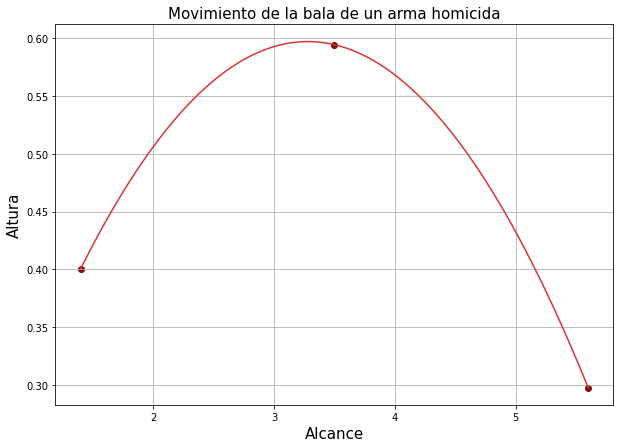

In [104]:
# A continuación se presenta el ploteo del movimiento de la bala en cuestión:

fig = plt.figure(figsize = (10,7))
plt.title('Movimiento de la bala de un arma homicida', fontsize = 15)
plt.xlabel(r'Alcance',fontsize = 15)
plt.ylabel(r'Altura',fontsize = 15)
plt.scatter(x_, y_, color = '#800F0F', marker = 'o')
plt.plot(x, y, color = '#DC3333')
plt.grid()


In [92]:
# En éste apartado se encuentran los coeficientes:

x = sym.Symbol('x', real = True)

formulae = LagrangeInterpolation(x, x_, y_)
formulae = sym.simplify(formulae)

main_expression = formulae.args[1]
diff_expression = sym.diff(main_expression, x)

main_expression = sym.lambdify([x], main_expression, 'numpy')
diff_expression = sym.lambdify([x], diff_expression, 'numpy')

linear_coefficient = main_expression(0)
cuadratic_coefficient = -diff_expression(0)

In [93]:
# Ahora se realizan los cálculos del ángulo y la velocidad:

angle = round(np.degrees(np.arctan(linear_coefficient)), 1)

velocity = round(np.sqrt((9.8)/(2*cuadratic_coefficient*(np.cos(np.radians(angle))**2))), 1)

print("El valor de la velocidad inicial de la vala es de {} m/s referida en un ángulo de {}° con respecto al eje de tiro.".format(velocity, angle))

El valor de la velocidad inicial de la vala es de 10.0 m/s referida en un ángulo de 20.0° con respecto al eje de tiro.


**5.** $\verb|(Python)|$ _Interpolación Newton-Gregory_: Para el siguiente conjunto de puntos:

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv

Encuentre el polinomio interpolante de menor grado usando el método Newton-Gregory.

In [60]:
# Instancia de descarga del .csv para el análisis de los datos:

if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/NewtonInterpolation.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [83]:
# Código principal:

main_data = pd.read_csv(Path_)

x_ = np.float64(main_data.X)
y_ = np.float64(main_data.Y)

def NewtonGregory_Interpolation(x_,y_, x):
    # Establecimiento de la matriz con las diferencias de orden n:
    main_polynomia = y_[0]
    matrix = np.zeros((len(x_),len(x_)))
    matrix[:,0] = y_
    aux_poly = 1.0

    for i in range(1,len(x_)):
        aux_poly *= (x - x_[i-1])
        for j in range(i,len(x_)): 
            matrix[j,i] = (matrix[j,i-1] - matrix[j-1,i-1])/(x_[j] - x_[j - i]) # Como las particiones no son equi-distantes, es necesario aplicar el método general 
        main_polynomia += aux_poly*matrix[i,i]                                      # del algoritmo de interpolación de Newton-Gregory.

    return main_polynomia, matrix

x = np.linspace(x_[0], x_[-1],1000)
y = []

for i in range(len(x)):
    y.append(NewtonGregory_Interpolation(x_, y_, x[i])[0])

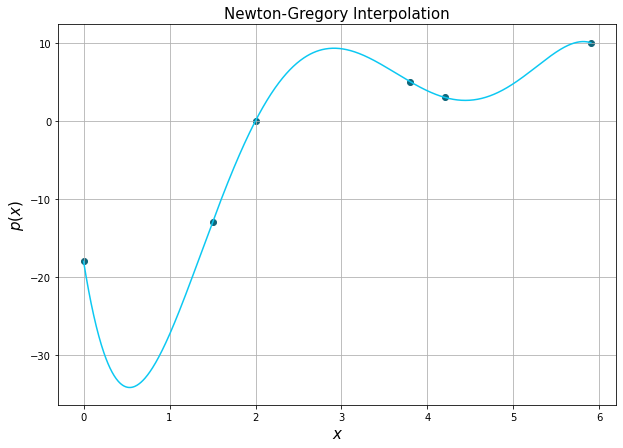

In [84]:
# Información general para el ploteo de la función:

fig = plt.figure(figsize = (10,7))
plt.title('Newton-Gregory Interpolation', fontsize = 15)
plt.xlabel(r'$x$',fontsize = 15)
plt.ylabel(r'$p(x)$',fontsize = 15)
plt.plot(x,y, color = '#0CC8F2')
plt.scatter(x_,y_, color = '#10667A',marker = 'o')
plt.grid()

x = sym.Symbol('x', real = True)
y, matrix = NewtonGregory_Interpolation(x_, y_, x)
y = sym.simplify(y)
matrix = sym.simplify(matrix)

In [52]:
y # Acá se puede apreciar al polinomio con el mínimo grado que contiene los puntos especificados:

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0

In [55]:
matrix  # Observando la matriz de diferenciales es posible notar que el mínimo grado es, ciertamente, 5.

[[-18.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-13.0, 3.33333333333333, 0.0, 0.0, 0.0, 0.0], [0.0, 26.0, 11.3333333333333, 0.0, 0.0, 0.0], [5.0, 2.77777777777778, -10.0966183574879, -5.63946097126875, 0.0, 0.0], [3.0, -5.0, -3.53535353535353, 2.430098082272, 1.92132358417637, 0.0], [10.0, 4.11764705882353, 4.34173669467787, 2.01976672564908, -0.093257126505209, -0.34145435774264]]

> **3.14. Integración:**

**7)** **$\verb|(Python)|$** . Una forma de generalizar el método de integración del trapecio para una integral doble de una función $f(x, y)$ consiste en dividir el plano $xy$ en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio $R = 1$ como sigue:


* Cree una grilla entre $−R$ y $R$ en el plano $xy$, donde el número de cuadrados en cada lado de la grilla sea $n$. Es decir, la grilla tendría $n + 1$ puntos en cada eje, y $n^2$ cuadrados pequeños.

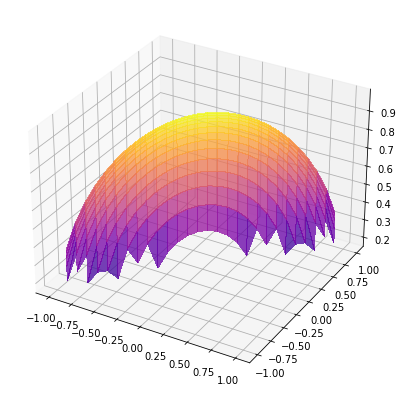

In [159]:
radius = 1
n = 30

x = np.linspace(-radius, radius, n)
y = np.linspace(-radius, radius, n)

def Semi_Sphere(x, y):
    if x**2 + y**2 <= 1:
        return np.sqrt(1 - ((x)**2 + (y)**2))
    else:
        return 0




"""
x, y = np.meshgrid(x_, y_)
z_ = np.zeros_like(x_)
z = np.sqrt(1 - (x**2 + y**2)) + z_
"""

fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(x, y, z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

* Para cada cuadrado pequeño calcule el promedio de la función en los cuatro vértices
y multiplique por el área del cuadrado pequeñoo. Si el punto queda fuera de la esfera
asuma que el valor de la función $f(x, y)$ es cero.

**13)** $\verb|(Python)|$ Escribir el polinomio $p(x) 3 + 5x + x^{2}$ en la base de Legendre. **Rpta:** $p(x) = \frac{10}{3}p_{0}(x) + 5p_{1}(x) + \frac{2}{3}p_{2}(x)$.

**17)** **$\verb|(Python)|$** La cuadratura de Gauss-Hermite está definida para integrales de la forma:

$$I = \int_{- \infty}^{\infty}{f(x) \cdot e^{-x^{2}}dx}$$

que tiene la siguiente representación en cuadraturas:

$$I \approx \sum_{i = 1}^{N} \omega_{i} \cdot f(x_{i})$$

donde los puntos $x_{i}$ son las raíces de los polinomios de Hermite $(H_{n}(x))$ y la formula de pesos está dada por:

$$\omega_{i} = \frac{2^{n - 1} \cdot n! \cdot \sqrt{\pi}}{n^{2} \cdot H_{n - 1}(r_{i})^{2}}$$

El estado de un oscilador armónico en mecánica cuántica está dado por las funciones de probabilidad:

$$\phi_{n}(\xi) = \frac{1}{\sqrt{2^{n} \cdot n!}} \left(\frac{m\omega}{\pi \hbar} \right)^{1/4} \cdot e^{\xi^{2}/2 \cdot H_{n}(\xi)}$$

donde $\xi = \frac{\sqrt{m\omega}}{\hbar} \cdot x$. Haga $\frac{\sqrt{m\omega}}{\hbar} = 1$, es decir, $\xi = 1$ para la aplicación numérica. Estime numéricamente el valor cuadrático medio de la posición de la particula en el primer estado exitado $(n = 1)$. El valor exacto de la integral está dado por:

$$\langle x^{2} \rangle = \int_{- \infty}^{\infty} |\phi_{1}(x)|^{2} \cdot x^{2} dx = \frac{3}{2}.$$

El polinomio de Hermite de primer orden está dado por:

$$H_{1}(x) = 2x.$$

La formula de rodrigues que genera los polinomios de Hermite está dada por:

$$H_{n}(\xi) = (-1){n} \cdot e^{\xi^{2}} \cdot \frac{d^{n}}{d\xi^{n}} \cdot e^{-\xi^{2}}.$$

Encontrar los ceros de los polinomios y los pesos de la cuadratura.

In [10]:
# Código principal: